In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import pickle
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [13]:
%run ../cow.py
%run ../optimize_pkg_2.py

In [3]:
filepath_down = "../data_tables/hs_rs_downlink/n"
filepath_up = "../data_tables/hs_rs_uplink/n"

## Short Blocklength

In [5]:
protocol_target = 10**(-9)
rx_SNR_range = arange(0, 12, 0.01)
# tx_SNR_range = arange(30, -10*log10(protocol_target), 0.01)
protocolbit = 4200
start_node, end_node = 2, 6
user_range = arange(start_node, end_node, 1)

In [6]:
filepath_down = "../data_tables/short_block_test/default/down/n"
filepath_up = "../data_tables/short_block_test/default/up/n"

In [9]:
%%time
optimize_3_data_2 = zeros((5, 6))
tx_SNR_range = arange(45, 60, 1)
rx_SNR_start = 2
N = 2
optimize_3_data_2[N-1] = optimize_3(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, 1)
print N, optimize_3_data_2[N-1]

2 [  5.10000000e+01   3.00000000e+00   3.00000000e+00   4.33273690e-15
   3.11859133e-08   3.11859133e-08]
CPU times: user 16min 20s, sys: 5.86 s, total: 16min 26s
Wall time: 17min 59s


In [10]:
%%time
optimize_3_data_2 = zeros((5, 6))
tx_SNR_range = arange(35, 60, 1)
rx_SNR_start = 2
N = 3
optimize_3_data_2[N-1] = optimize_3(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, 1)
print N, optimize_3_data_2[N-1]

3 [  3.90000000e+01   4.00000000e+00   5.00000000e+00   2.09780264e-15
   1.70239658e-06   1.27944396e-09]
CPU times: user 14min 37s, sys: 7.08 s, total: 14min 44s
Wall time: 15min 26s


In [11]:
%%time
tx_SNR_range = arange(30, 60, 1)
rx_SNR_start = 4
N = 4
optimize_3_data_2[N-1] = optimize_3(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, 1)
print N, optimize_3_data_2[N-1]

4 [  3.40000000e+01   5.00000000e+00   8.00000000e+00   1.66850042e-10
   5.62737665e-04   6.31821039e-10]
CPU times: user 19min 22s, sys: 11 s, total: 19min 33s
Wall time: 34min 38s


In [12]:
%%time
tx_SNR_range = arange(30, 60, 1)
rx_SNR_start = 9
N = 5
optimize_3_data_2[N-1] = optimize_3(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, 1)
print N, optimize_3_data_2[N-1]

5 [  3.30000000e+01   9.00000000e+00   1.00000000e+01   4.70128885e-06
   9.26013188e-07   1.22792898e-08]
CPU times: user 17min 39s, sys: 13.3 s, total: 17min 52s
Wall time: 21min 47s


In [21]:
optimize_1_short = array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  5.09400000e+01,   2.44000000e+00,   3.55000000e+00,
          3.55000000e+00,   8.60089696e-11,   9.48693257e-11,
          9.48693257e-11],
       [  3.86500000e+01,   3.34000000e+00,   5.31000000e+00,
          5.31000000e+00,   8.67846335e-11,   9.57194967e-11,
          9.57194967e-11],
       [  3.44400000e+01,   5.05000000e+00,   8.29000000e+00,
          8.29000000e+00,   9.50248074e-11,   9.82982445e-11,
          9.82982445e-11],
       [  3.29200000e+01,   1.11800000e+01,   1.09100000e+01,
          1.09100000e+01,   9.41287048e-11,   9.55602264e-11,
          9.55602264e-11]])

In [20]:
print optimize_3_data_2

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  5.10000000e+01   3.00000000e+00   3.00000000e+00   4.33273690e-15
    3.11859133e-08   3.11859133e-08]
 [  3.90000000e+01   4.00000000e+00   5.00000000e+00   2.09780264e-15
    1.70239658e-06   1.27944396e-09]
 [  3.40000000e+01   5.00000000e+00   8.00000000e+00   1.66850042e-10
    5.62737665e-04   6.31821039e-10]
 [  3.30000000e+01   9.00000000e+00   1.00000000e+01   4.70128885e-06
    9.26013188e-07   1.22792898e-08]]


In [30]:
print optimize_3_data_2[1:,0]
print optimize_1_short[1:,0]
print ''
print optimize_3_data_2[1:,2]
print optimize_1_short[1:,3]

[ 51.  39.  34.  33.]
[ 50.94  38.65  34.44  32.92]

[  3.   5.   8.  10.]
[  3.55   5.31   8.29  10.91]


In [36]:
print ''
print optimize_1_short[1:,3]
print optimize_1_short[1:,1]
print optimize_1_short[1:,2]


[  3.55   5.31   8.29  10.91]
[  2.44   3.34   5.05  11.18]
[  3.55   5.31   8.29  10.91]


In [38]:
print optimize_3_data_2[1:,1]
print optimize_3_data_2[1:,2]

[ 3.  4.  5.  9.]
[  3.   5.   8.  10.]


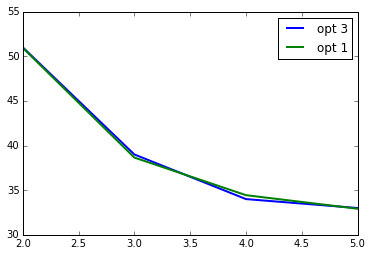

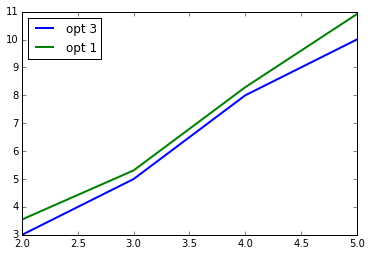

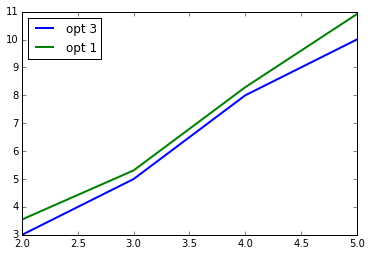

In [37]:
plot(range(2,6), optimize_3_data_2[1:,0], lw=2.0, label='opt 3')
plot(range(2,6), optimize_1_short[1:,0], lw=2.0, label='opt 1')
legend(loc=0)

figure()
plot(range(2,6), np.maximum(optimize_3_data_2[1:,1], optimize_3_data_2[1:,2]), lw=2.0, label='opt 3')
plot(range(2,6), optimize_1_short[1:,2], lw=2.0, label='opt 1')
legend(loc=0)

figure()
plot(range(2,6), optimize_3_data_2[1:,2], lw=2.0, label='opt 3')
plot(range(2,6), optimize_1_short[1:,3], lw=2.0, label='opt 1')
legend(loc=0)

## Full Blocklength

In [31]:
filepath_down = "../data_tables/hs_rs_downlink/n"
filepath_up = "../data_tables/hs_rs_uplink/n"

In [15]:
%%time
N = 35
tSNR_start = 19
rSNR_start = 10.7
rSNR3_start = 11

protocol_target = 10**(-9)
protocolbit = 4*10**4
d_rSNR = 0.1
precision = 0

tx_SNR_range = np.arange(tSNR_start, 50, 1)
result = optimize_3(N, rSNR_start, rSNR3_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, d_rSNR, precision)
print result

(19, 10.699999999999999, 11.0, array(0.0), array(3.201678921503452e-10), array(5.591160867468625e-11))
CPU times: user 39min 17s, sys: 34.8 s, total: 39min 52s
Wall time: 43min 50s


<string>:93: RuntimeWarning: divide by zero encountered in log10


In [34]:
%%time
%run ../optimize_pkg_2.py
# How long it takes if rSNR3 = rSNRdu, pf3 = 0
N = 10
tSNR = 14
rSNRdu = 2
rSNR3 = 3
a3 = xor_analysis_new(N, tSNR, rSNRdu, rSNR3)
print a3

0.999999986041
CPU times: user 10.8 s, sys: 147 ms, total: 10.9 s
Wall time: 11.5 s


In [39]:
1-a3

1.3958532107949395e-08